In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 

# Table 1

In [38]:
from pathlib import Path 
file_list = glob.glob("substitution_mode_res_baseline/*")
metric = "NDCG_10"
# get mean result
# for file in file_list:
#     df = pd.read_csv(file,index_col=0)
#     df_new = df[["test_Y_MRR_male","test_Y_HR_5_male","test_Y_HR_10_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_HR_5_female","test_Y_HR_10_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)
#     df[["test_Y_MRR_UGF","test_Y_HR_5","test_Y_HR_10","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new
#     res = df.groupby(['substitute_mode'])[[f'test_Y_{metric}',f'test_Y_{metric}_male',f'test_Y_{metric}_female',f"test_Y_{metric}_UGF"]].mean()
#     # res.to_csv(f"table1/{file.split('/')[1]}")
#     print(file)
#     print(res)
# get all seed result
for file in file_list:
    df = pd.read_csv(file,index_col=0)
    df_new = df[["test_Y_MRR_male","test_Y_HR_5_male","test_Y_HR_10_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_HR_5_female","test_Y_HR_10_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)
    df[["test_Y_MRR_UGF","test_Y_HR_5","test_Y_HR_10","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new
    for seed in [0,1,2]:
        res = df[df["seed"]==seed][['substitute_mode',f'test_Y_{metric}',f'test_Y_{metric}_male',f'test_Y_{metric}_female',f"test_Y_{metric}_UGF"]]
        Path(f"table1/{file.split('/')[1][:-4]}").mkdir(exist_ok=True,parents=True)
        res.to_csv(f"table1/{file.split('/')[1][:-4]}/{seed}.csv")

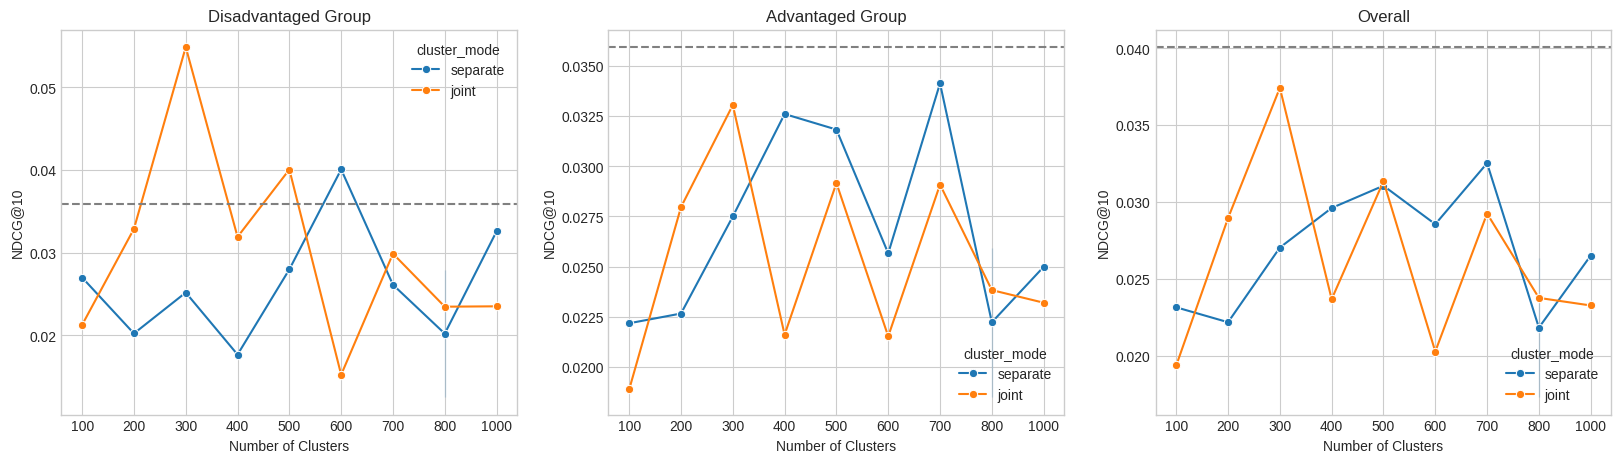

In [136]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
seed = 3
metric = 'test_Y_NDCG_5'
sns.lineplot(data=df[(df['seed']==seed)], x="total_cluster", y=f"{metric}_female", hue="cluster_mode",marker='o',ax=axes[0])              
axes[0].set_title('Disadvantaged Group')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('NDCG@10')
axes[0].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster_mode",marker='o',ax=axes[1])   

axes[1].set_title('Advantaged Group')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('NDCG@10')
axes[1].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')

sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster_mode",marker='o',ax=axes[2])              
axes[2].set_title('Overall')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('NDCG@10')
axes[2].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')

In [45]:
# df[["test_Y_MRR_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]]  = df[["test_Y_MRR_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]] - df[["test_Y_MRR_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]]
df_new = df[["test_Y_MRR_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)

# Rename the new columns appropriately
df_new.columns = ['A_minus_D', 'B_minus_E', 'C_minus_F']
df[["test_Y_MRR_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new

In [151]:
color = sns.color_palette("tab10")
print(color[0])

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)


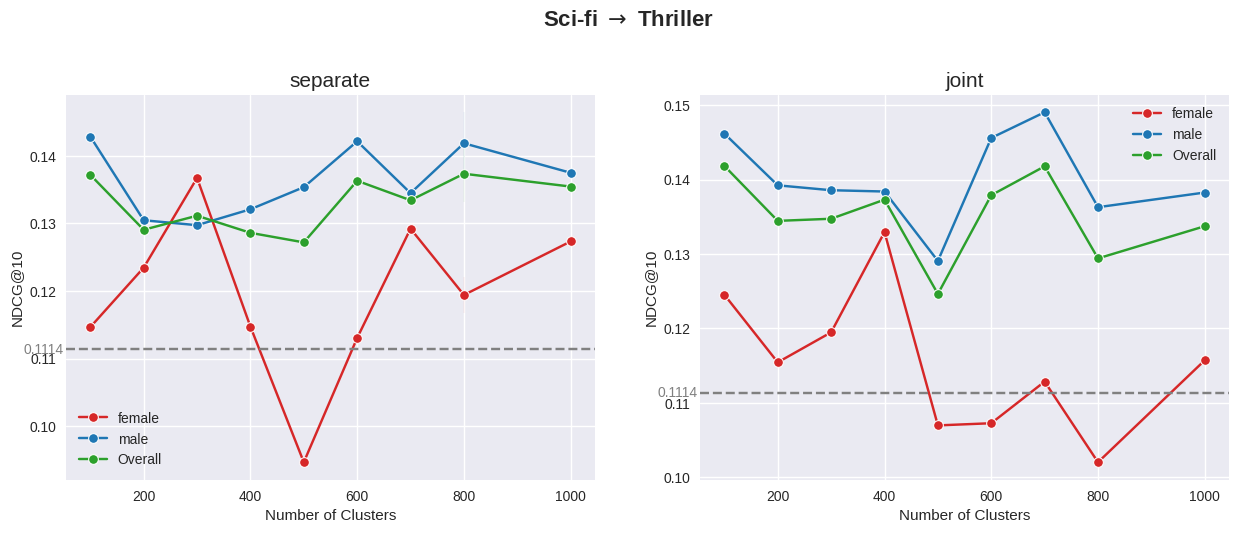

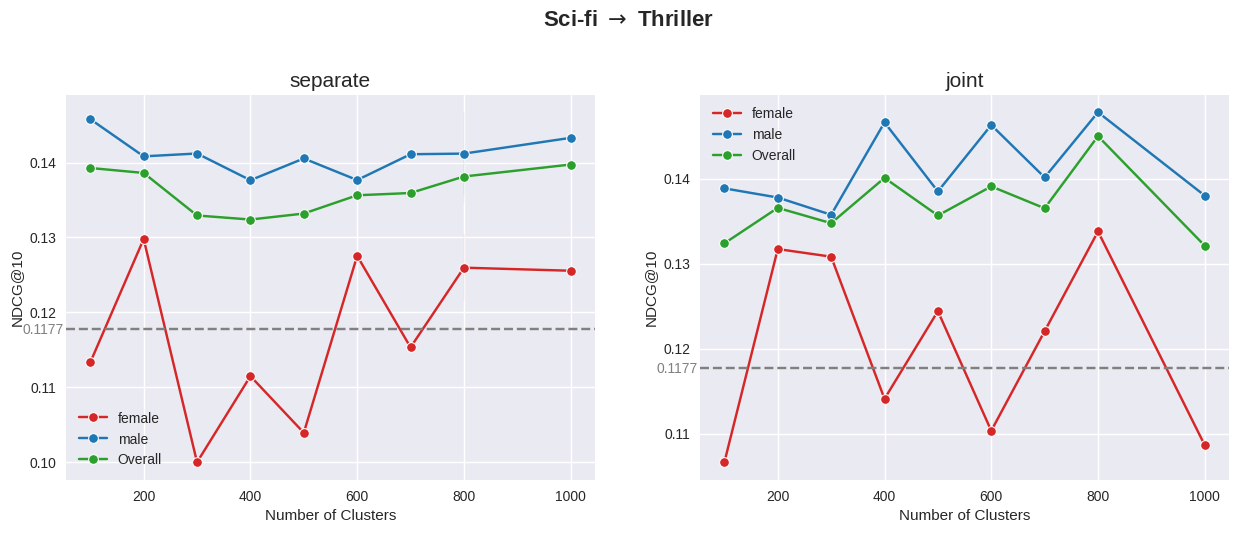

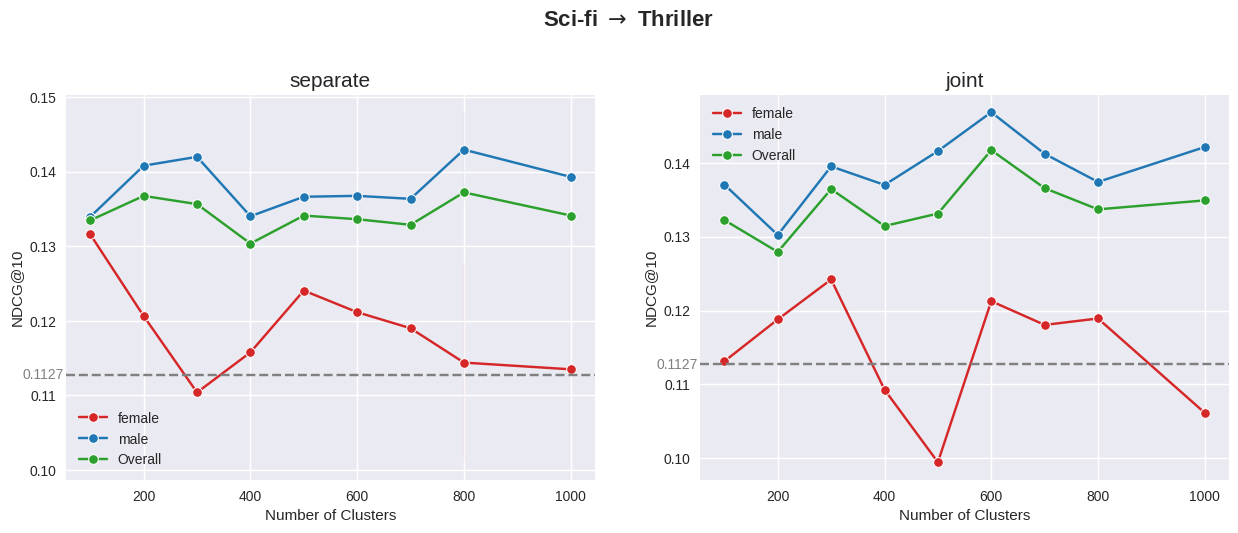

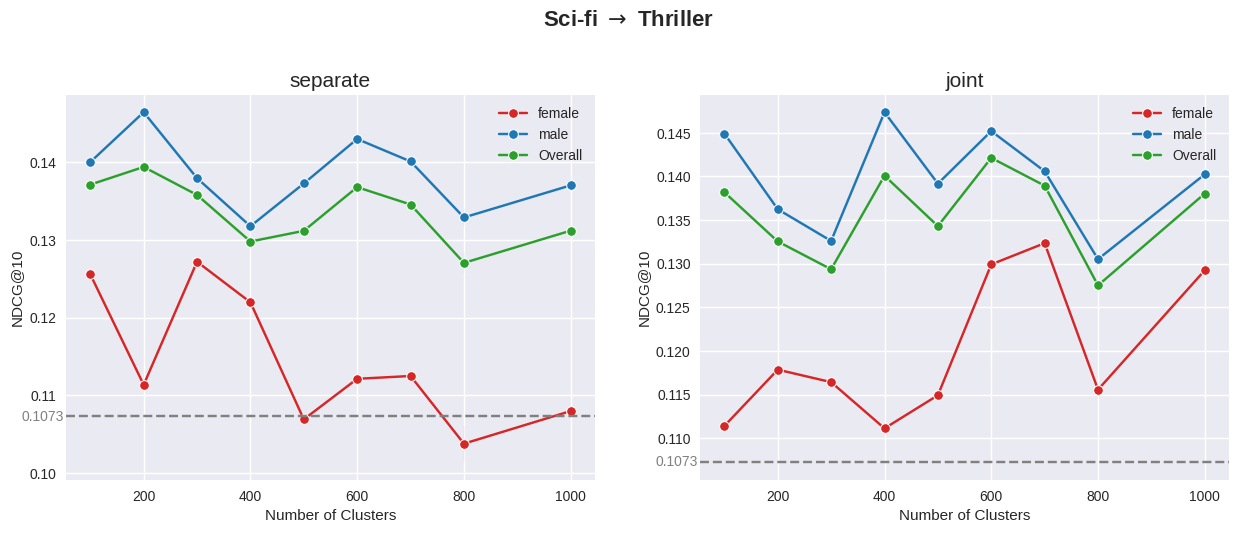

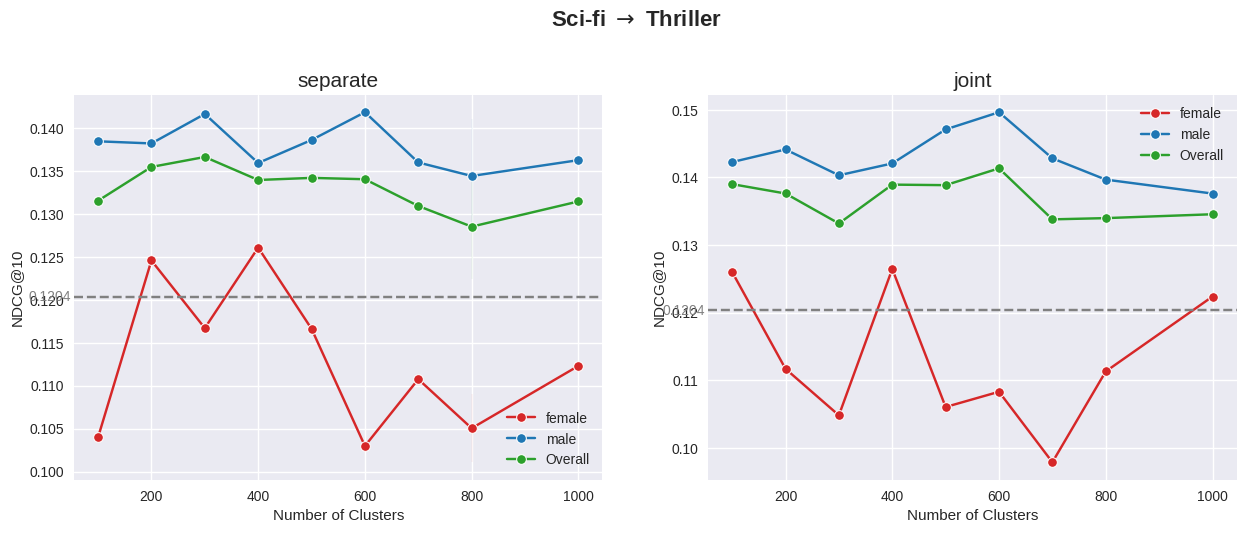

In [172]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
def plot_cluster_mode(file_name,seed, metric):
    plt.style.use("seaborn-v0_8")
    color = sns.color_palette("tab10")
    df = pd.read_csv(file_name,index_col=0)
    df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
    df['total_cluster'] = pd.to_numeric(df['total_cluster'], errors='coerce')
    #calculate the UGF
    df_new = df[["test_Y_MRR_male","test_Y_HR_5_male","test_Y_HR_10_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_HR_5_female","test_Y_HR_10_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)
    df[["test_Y_MRR_UGF","test_Y_HR_10","test_Y_HR_10","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new
    
    df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
    metric_name = '@'.join(metric.split('_')[-2:])
    # plot the result of separate cluster mode
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    for mode, i in zip(["separate",'joint'],[0,1]):
        sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])& (df['cluster mode']==mode)], x="total_cluster", y=f"{metric}_female",marker='o',ax=axes[i],label="female",color=color[3])           
        sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline']) & (df['cluster mode']==mode)], x="total_cluster", y=f"{metric}_male", marker='o',ax=axes[i],label="male",color=color[0])
        sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline']) & (df['cluster mode']==mode)], x="total_cluster", y=f"{metric}", marker='o',ax=axes[i],label="Overall",color=color[2])   
        axes[i].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
        axes[i].set_title(mode, fontsize=15)
        axes[i].set_xlabel('Number of Clusters')
        axes[i].set_ylabel(metric_name)
        axes[i].legend() 
        # add annotation for baseline value to the plot
        baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0]
        x_lim = axes[i].get_xlim()  # Returns a tuple (x_min, x_max)
        x_pos = x_lim[0]-5 
        axes[i].text(
        x=x_pos,  # Replace with the appropriate x position for your text
        y=baseline_value,
        s=f"{baseline_value:.4f}",
        va='center',
        ha='right',
        color='gray'
        )
        file = file_name.split('/')[-1][:-4].split("_")
        fig.suptitle(rf'{file[0].capitalize()} $\rightarrow$ {file[1].capitalize()}', fontsize=16, fontweight='bold', x=0.5, y=1.05)
    
folder = "cluster_mode_res_new"
file_list = glob.glob(f"{folder}/*")
for i, file in enumerate(file_list):
    for seed in range(3,8):
        plot_cluster_mode(file,seed, 'test_Y_NDCG_10')
        plt.show()
# folder = "cluster_mode_res_new"
# file_list = glob.glob(f"{folder}/*")
# for i, file in enumerate(file_list):
#     if i==0:
#         plot_seed_result(file,seed, 'test_Y_NDCG_10')
#         plt.show()

3


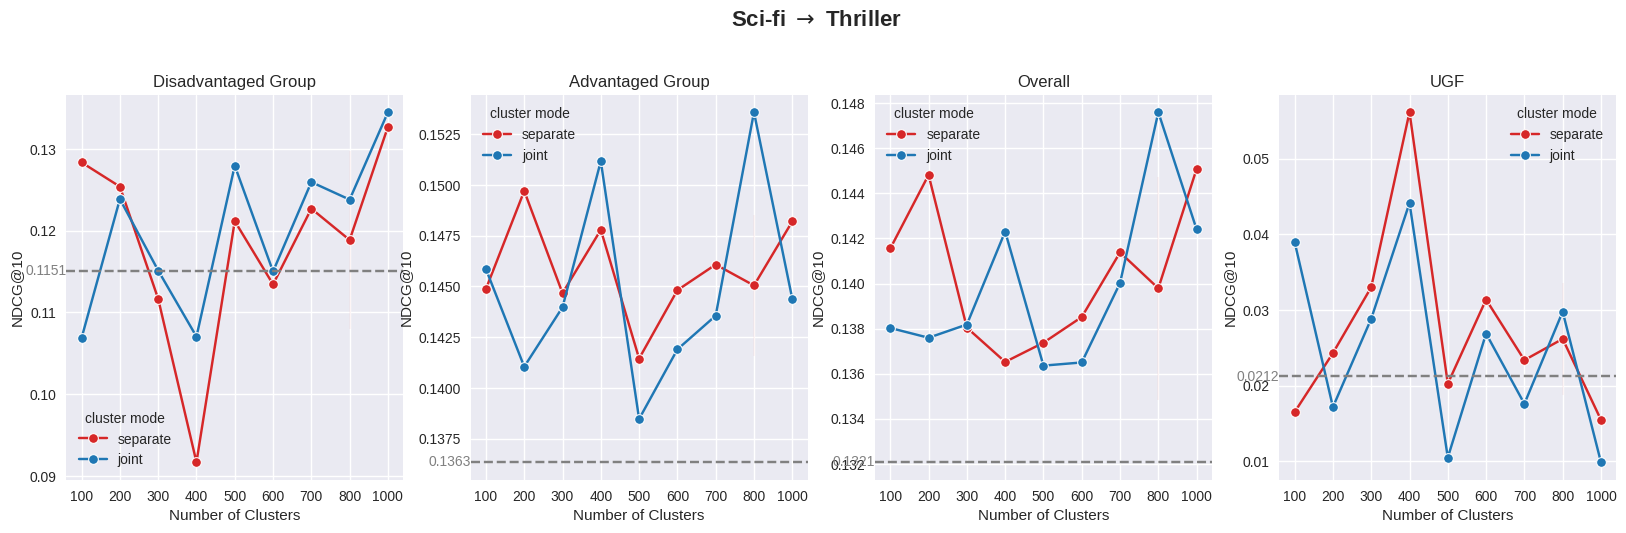

4


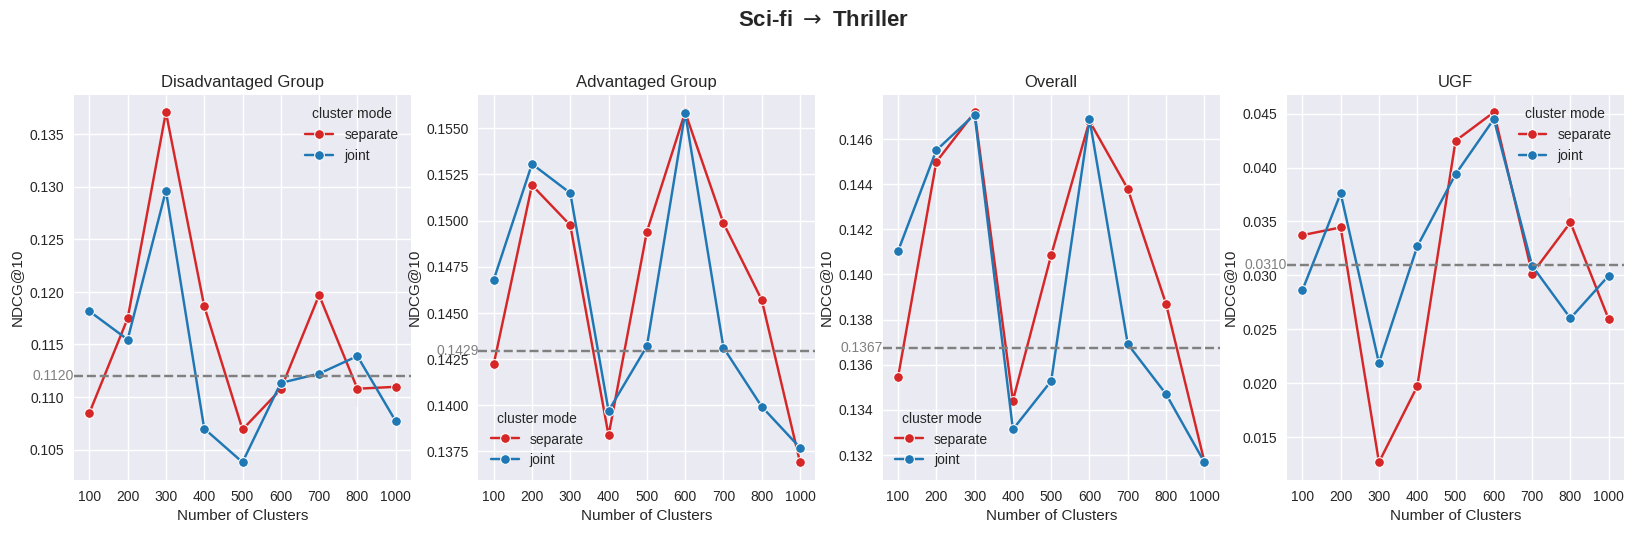

5


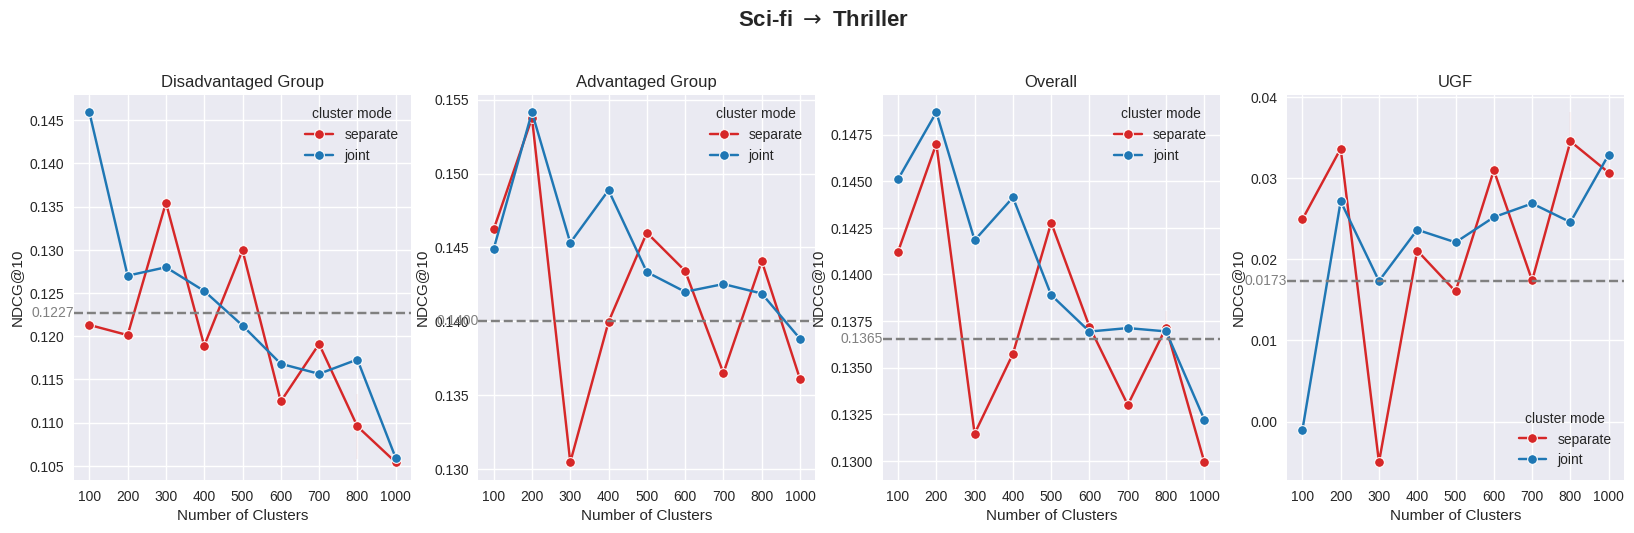

6


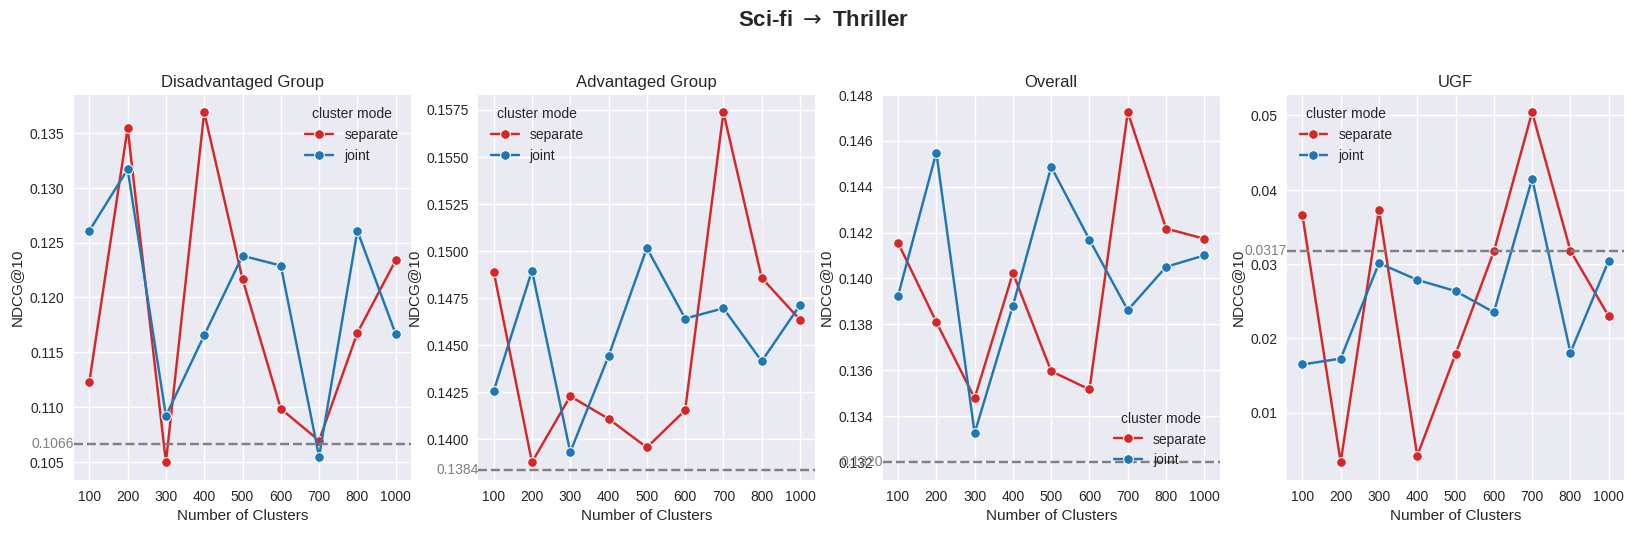

7


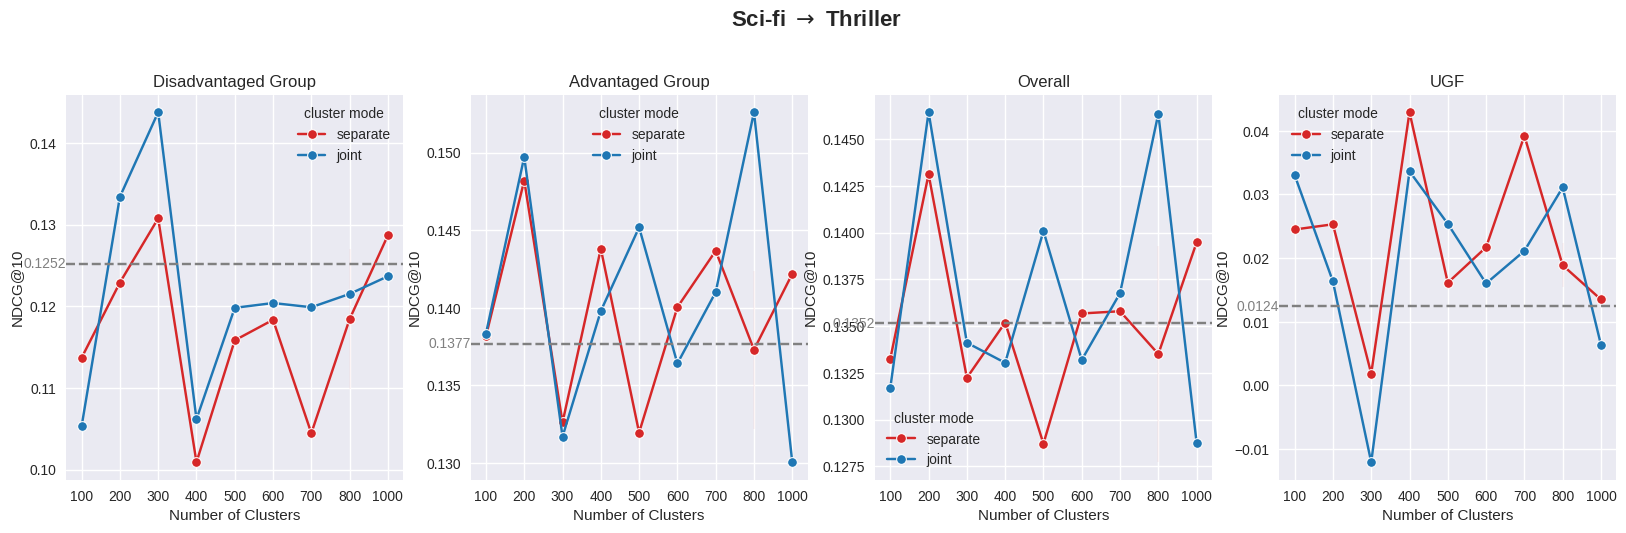

3


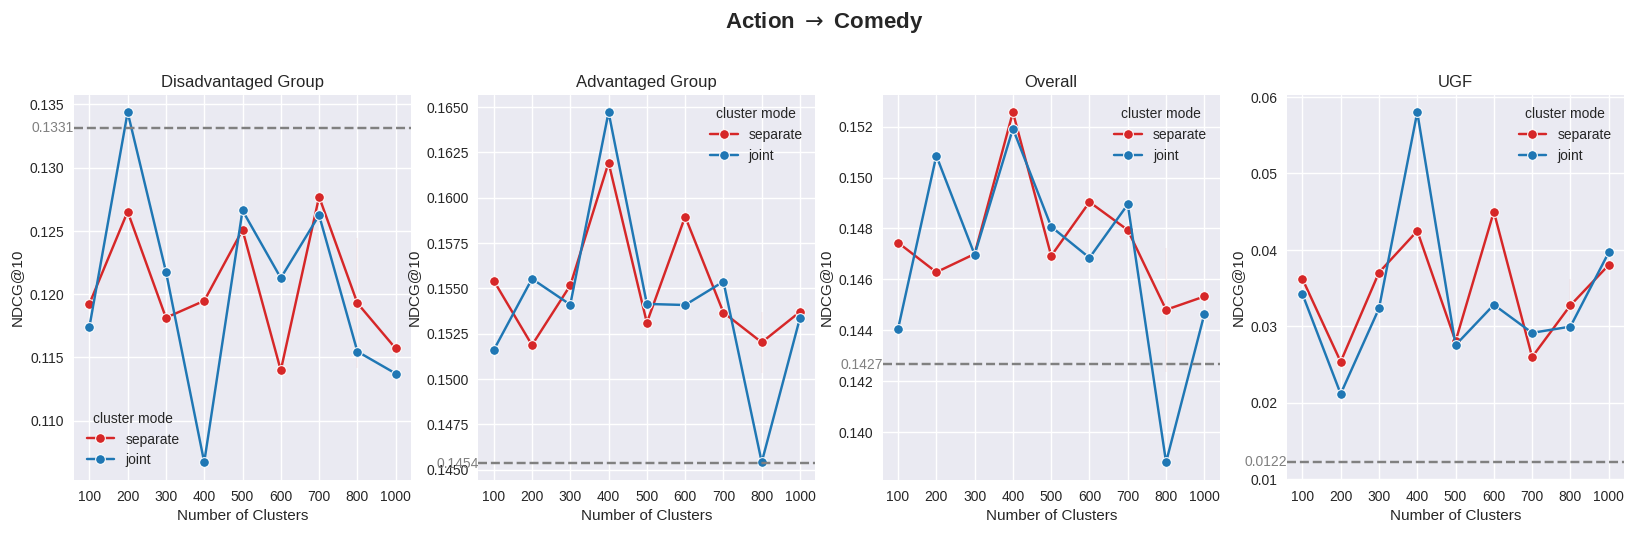

4


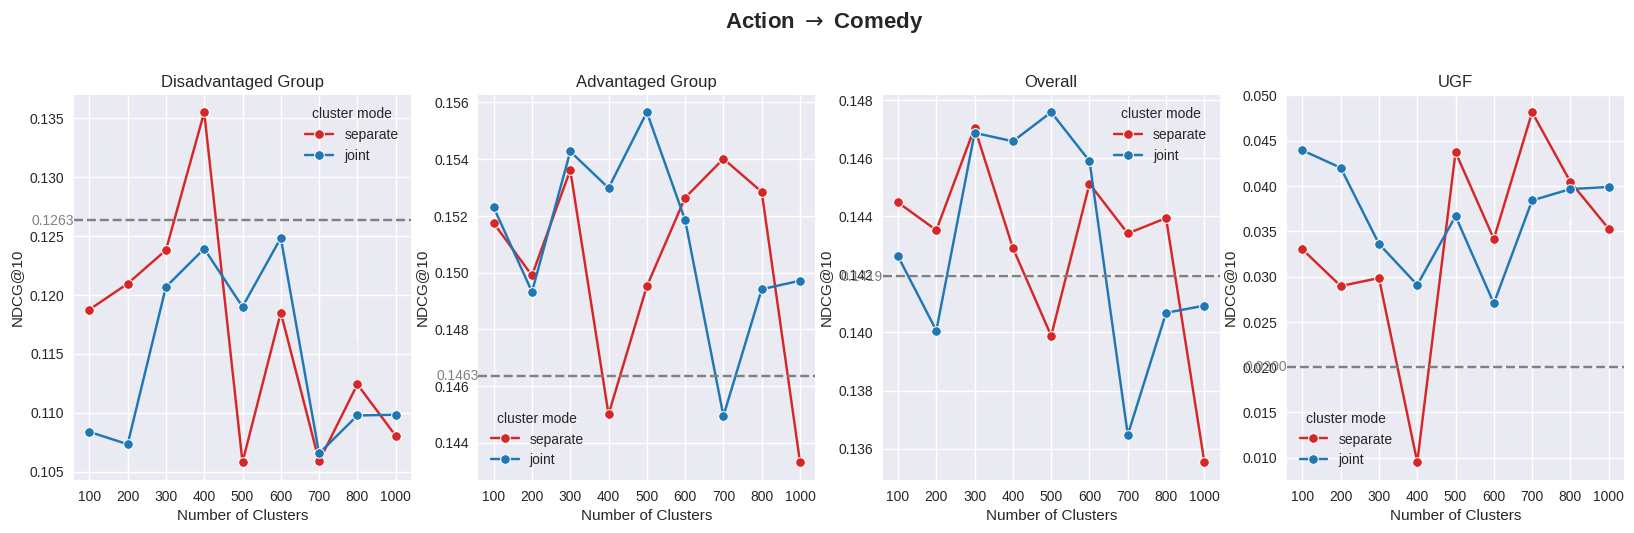

5


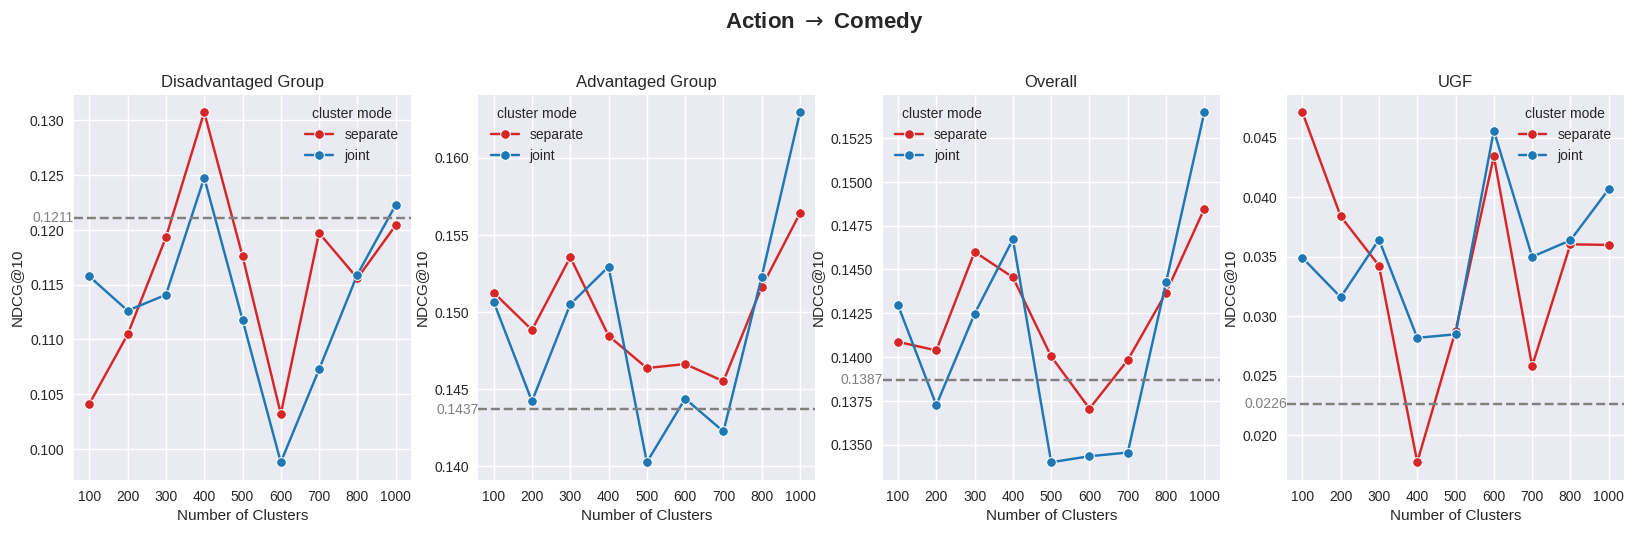

6


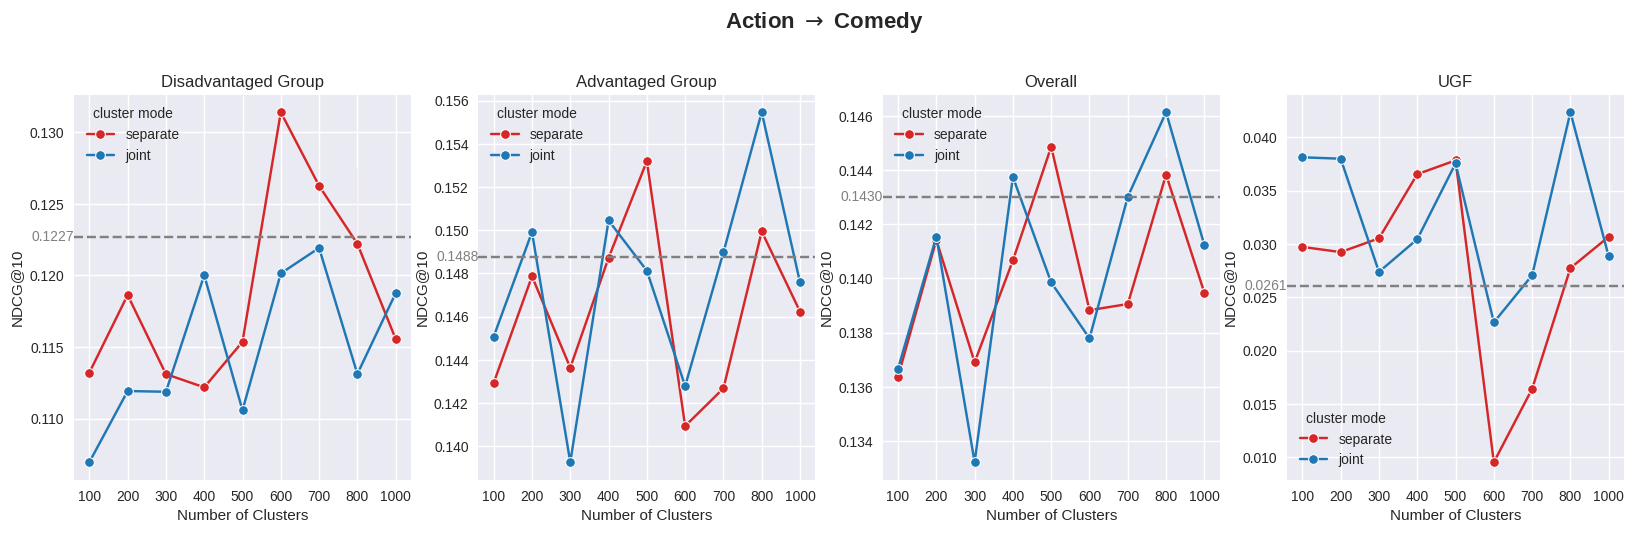

7


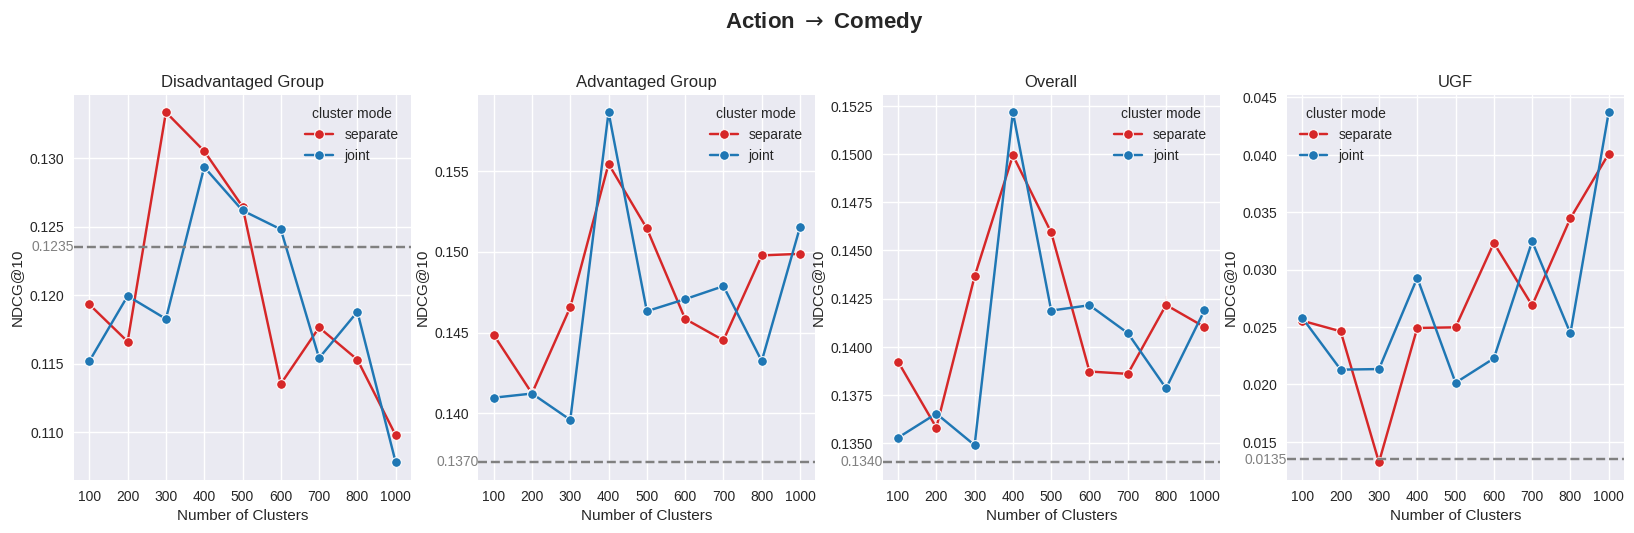

In [173]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
folder = "cluster_mode_res_new"
file_list = glob.glob(f"{folder}/*")
def plot_seed_result(file_name,seed, metric):
    plt.style.use("seaborn-v0_8")
    color = sns.color_palette("tab10")
    palette = {"separate": color[3], "joint": color[0]}
    df = pd.read_csv(file_name,index_col=0)
    df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
    #calculate the UGF
    df_new = df[["test_Y_MRR_male","test_Y_HR_5_male","test_Y_HR_10_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_HR_5_female","test_Y_HR_10_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)
    df[["test_Y_MRR_UGF","test_Y_HR_5_UGF","test_Y_HR_10_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new
    
    df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
    # plot the average value of NDCG@10 for each cluster mode under different number of clusters
    fig, axes = plt.subplots(1,4,figsize=(20,5))
    metric_name = '@'.join(metric.split('_')[-2:])
    # female
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette)           
    axes[0].set_title('Disadvantaged Group')
    axes[0].set_xlabel('Number of Clusters')
    axes[0].set_ylabel(metric_name)
    axes[0].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
    baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0]
    x_lim = axes[0].get_xlim()  # Returns a tuple (x_min, x_max)
    x_pos = x_lim[0] 
    axes[0].text(
    x=x_pos,  # Replace with the appropriate x position for your text
    y=baseline_value,
    s=f"{baseline_value:.4f}",
    va='center',
    ha='right',
    color='gray'
    )
    # male
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster mode",marker='o',ax=axes[1],palette=palette)              
    axes[1].set_title('Advantaged Group')
    axes[1].set_xlabel('Number of Clusters')
    axes[1].set_ylabel(metric_name)
    axes[1].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_male"].values[0], color='gray', linestyle='--')
    baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_male"].values[0]
    x_lim = axes[1].get_xlim()  # Returns a tuple (x_min, x_max)
    x_pos = x_lim[0] 
    axes[1].text(
    x=x_pos,  # Replace with the appropriate x position for your text
    y=baseline_value,
    s=f"{baseline_value:.4f}",
    va='center',
    ha='right',
    color='gray'
    )
    # Overall
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster mode",marker='o',ax=axes[2],palette=palette)              
    axes[2].set_title('Overall')
    axes[2].set_xlabel('Number of Clusters')
    axes[2].set_ylabel(metric_name)
    axes[2].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')
    baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}"].values[0]
    x_lim = axes[2].get_xlim()  # Returns a tuple (x_min, x_max)
    x_pos = x_lim[0] 
    axes[2].text(
    x=x_pos,  # Replace with the appropriate x position for your text
    y=baseline_value,
    s=f"{baseline_value:.4f}",
    va='center',
    ha='right',
    color='gray'
    )
    # UGF
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_UGF", hue="cluster mode",marker='o',ax=axes[3],palette=palette)
    axes[3].set_title('UGF')
    axes[3].set_xlabel('Number of Clusters')
    axes[3].set_ylabel(metric_name)
    axes[3].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_UGF"].values[0], color='gray', linestyle='--')
    baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_UGF"].values[0]
    x_lim = axes[3].get_xlim()  # Returns a tuple (x_min, x_max)
    x_pos = x_lim[0] 
    axes[3].text(
    x=x_pos,  # Replace with the appropriate x position for your text
    y=baseline_value,
    s=f"{baseline_value:.4f}",
    va='center',
    ha='right',
    color='gray'
    )
    
    
    file = file_name.split('/')[-1][:-4].split("_")
    fig.suptitle(rf'{file[0].capitalize()} $\rightarrow$ {file[1].capitalize()}', fontsize=16, fontweight='bold', x=0.5, y=1.05)
seed = 7
folder = "cluster_mode_res_kmeans"
file_list = glob.glob(f"{folder}/*")
for i, file in enumerate(file_list):
    for seed in [3,4,5,6,7]:
        print(seed)
        plot_seed_result(file,seed, 'test_Y_NDCG_10')
        plt.show()

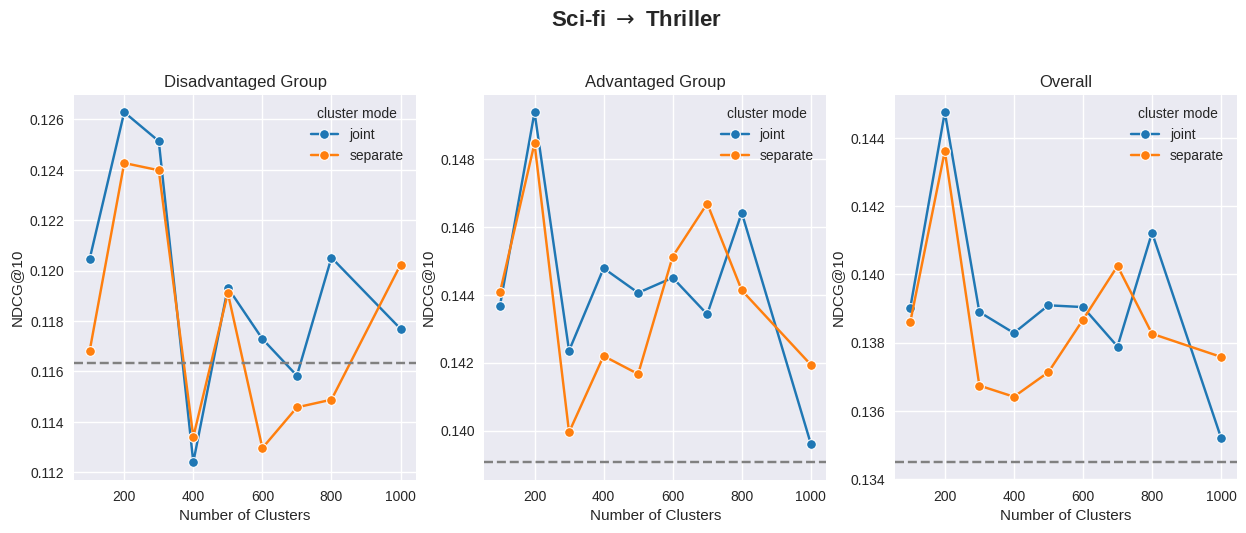

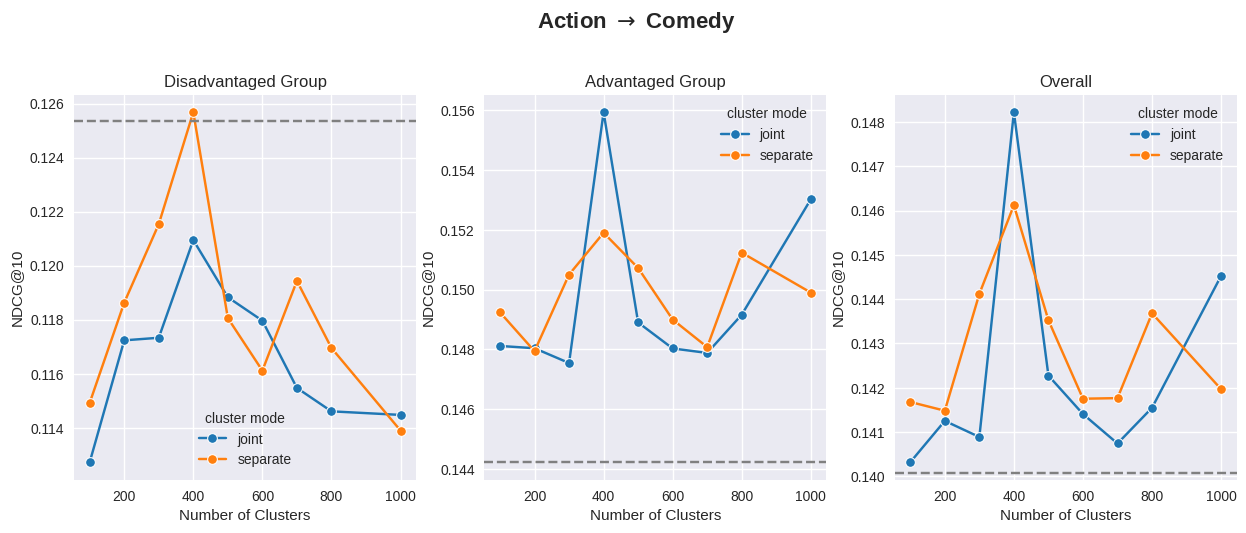

In [144]:
# read in the data
def plot_average_result(file_name, metric):
    plt.style.use("seaborn-v0_8")
    color = sns.color_palette("tab10")
    palette = {"separate": color[1], "joint": color[0]}
    df = pd.read_csv(file_name,index_col=0)
    df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
    df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
    # Group by 'cluster_mode' and 'total_cluster' and calculate the mean
    filtered_df = df[df['seed'].isin(list(range(3,8)))]
    average_df = filtered_df.groupby(['cluster mode', 'total_cluster']).mean(numeric_only=True).reset_index()
    average_df["total_cluster"] = average_df["total_cluster"].astype('int')
    average_df['is_baseline'] = average_df['is_baseline'].astype('bool')
    average_df = average_df.sort_values(by='total_cluster')
    # calculate mean baseline value
    baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()
    baseline_df['is_baseline'] = baseline_df['is_baseline'].astype('bool')
    average_df = pd.concat([average_df, baseline_df], axis=0)
    fig, axes = plt.subplots(1,3,figsize=(15,5))
    metric_name = '@'.join(metric.split('_')[-2:])
    #female
    sns.lineplot(data=average_df[(average_df['seed']==5) & (~average_df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette)           
    axes[0].set_title('Disadvantaged Group')
    axes[0].set_xlabel('Number of Clusters')
    axes[0].set_ylabel(metric_name)
    axes[0].axhline(average_df[(average_df['seed']==5) & (average_df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
    #male
    sns.lineplot(data=average_df[(average_df['seed']==5) & (~average_df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster mode",marker='o',ax=axes[1],palette=palette)              
    axes[1].set_title('Advantaged Group')
    axes[1].set_xlabel('Number of Clusters')
    axes[1].set_ylabel(metric_name)
    axes[1].axhline(average_df[(average_df['seed']==5) & (average_df['is_baseline'])][f"{metric}_male"].values[0], color='gray', linestyle='--')
    #overall
    sns.lineplot(data=average_df[(average_df['seed']==5) & (~average_df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster mode",marker='o',ax=axes[2],palette=palette)              
    axes[2].set_title('Overall')
    axes[2].set_xlabel('Number of Clusters')
    axes[2].set_ylabel(metric_name)
    axes[2].axhline(average_df[(average_df['seed']==5) & (average_df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')

    file = file_name.split('/')[-1][:-4].split("_")
    fig.suptitle(rf'{file[0].capitalize()} $\rightarrow$ {file[1].capitalize()}', fontsize=16, fontweight='bold', x=0.5, y=1.05)

file_list = glob.glob("cluster_mode_res_kmeans/*")
for i, file in enumerate(file_list):
    # if i==0:
    plot_average_result(file, 'test_Y_NDCG_10')
    plt.show()
# file_list = glob.glob("cluster_mode_res_new/*")
# for i, file in enumerate(file_list):
#     if i==0:
#         plot_average_result(file, 'test_Y_NDCG_10')
#         plt.show()
# def plot_average_result(file_name, metric):
#     color = sns.color_palette("tab10")
#     palette = {"separate": color[1], "joint": color[0]}
#     plt.style.use('seaborn-whitegrid')
#     df = pd.read_csv(file_name,index_col=0)
#     df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1])
#     df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
#     # Group by 'cluster_mode' and 'total_cluster' and calculate the mean
#     filtered_df = df[df['seed'].isin([0, 1, 2])]
#     average_df = filtered_df.groupby(['cluster mode', 'total_cluster']).mean().reset_index()
#     average_df["total_cluster"] = average_df["total_cluster"].astype('int')
#     average_df = average_df.sort_values(by='total_cluster')
#     # plot the average value of NDCG@10 for each cluster mode under different number of clusters
#     fig, axes = plt.subplots(1,3,figsize=(20,5))
#     metric_name = '@'.join(metric.split('_')[-2:])
#     sns.lineplot(data=average_df[average_df['seed']==1], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette)                
#     axes[0].set_title('Disadvantaged Group')
#     axes[0].set_xlabel('Number of Clusters')
#     axes[0].set_ylabel(metric_name)
#     sns.lineplot(data=average_df[average_df['seed']==1], x="total_cluster", y=f"{metric}_male", hue="cluster mode",marker='o',ax=axes[1],palette=palette)               
#     axes[1].set_title('Advantaged Group')
#     axes[1].set_xlabel('Number of Clusters')
#     axes[1].set_ylabel(metric_name)
#     sns.lineplot(data=average_df[average_df['seed']==1], x="total_cluster", y=f"{metric}", hue="cluster mode",marker='o',ax=axes[2],palette=palette)                
#     axes[2].set_title('Overall')
#     axes[2].set_xlabel('Number of Clusters')
#     axes[2].set_ylabel(metric_name)
#     file = "->".join(file_name.split('/')[-1][:-4].split("_"))
#     fig.suptitle(f'{file}', fontsize=16, fontweight='bold', x=0.5, y=1.05)
